Year with Highest Total Meditation Population: 2022 (6.598901)


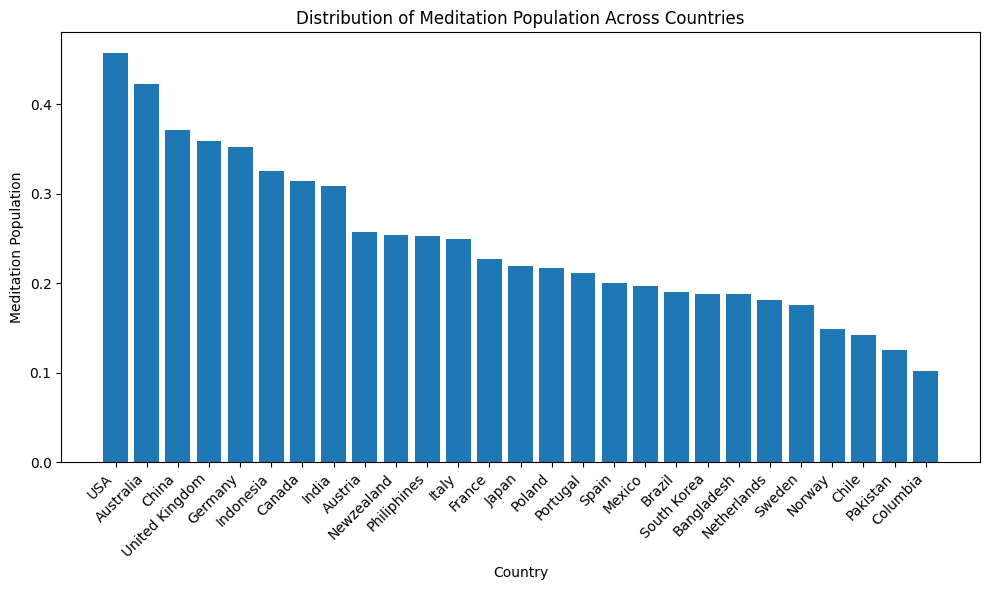

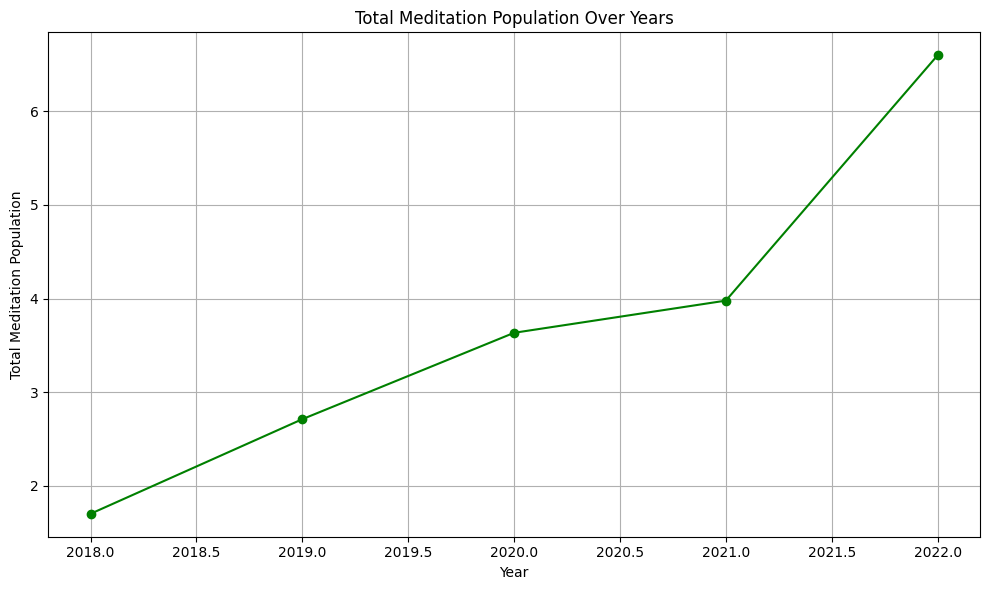

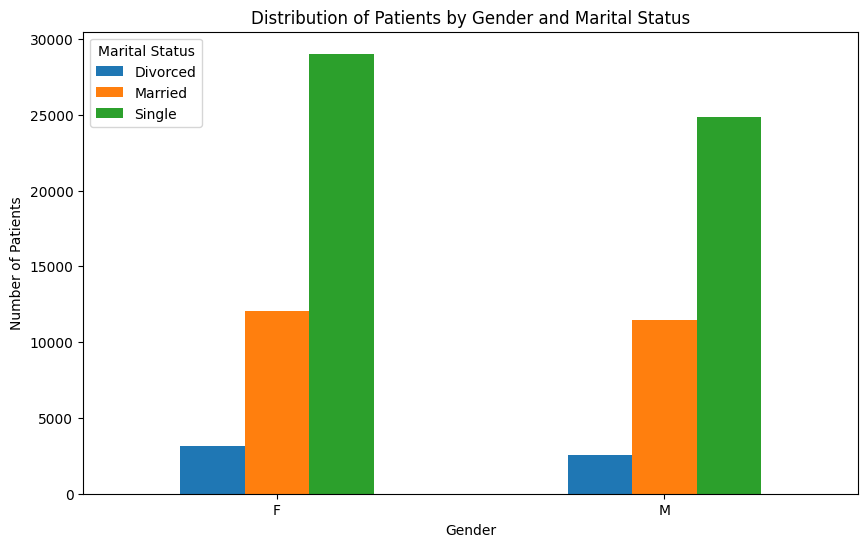

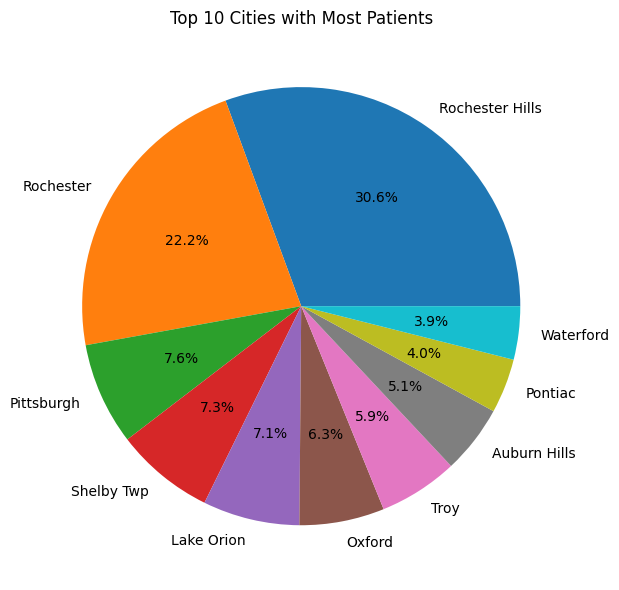

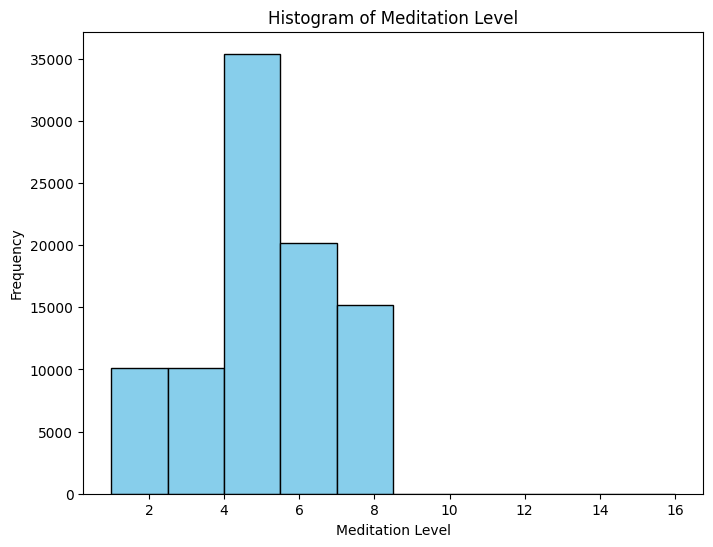

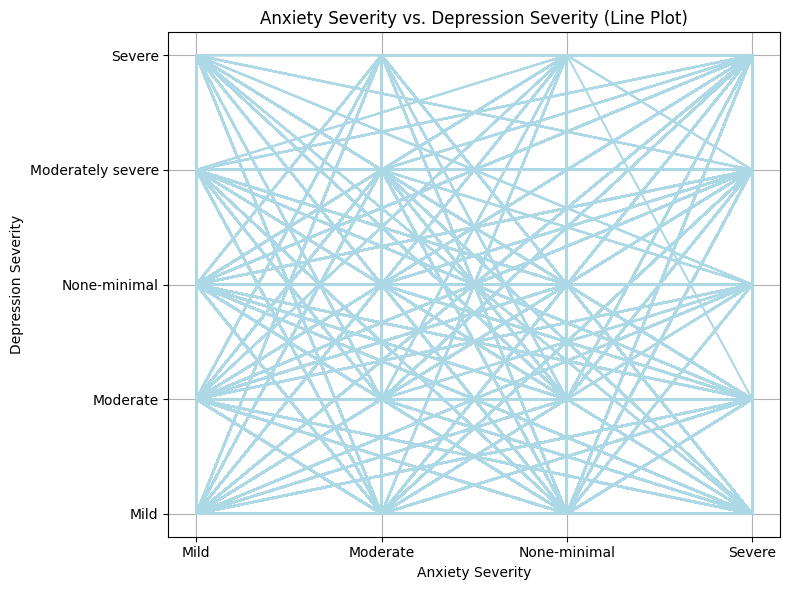

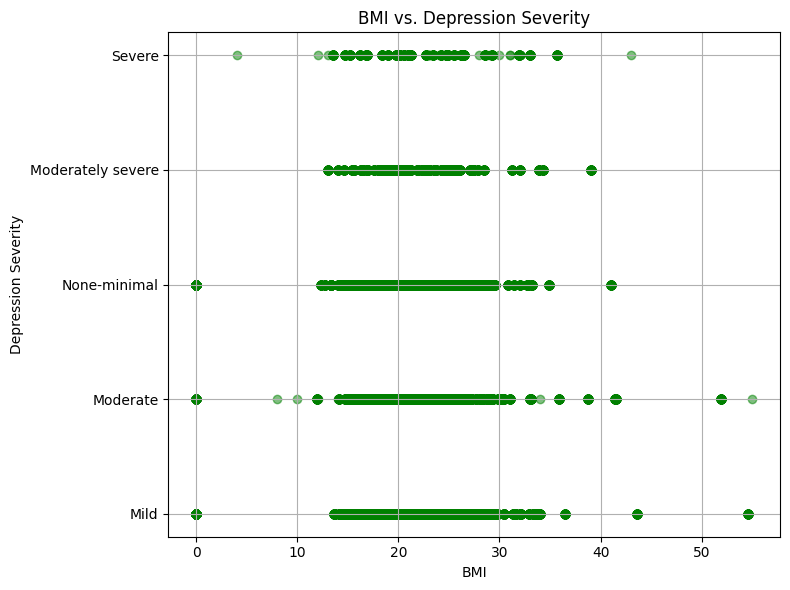

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filepath):
    try:
        return pd.read_excel(filepath)
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return None

def analyze_world_data(world_data):
    # Calculate total meditation population by year
    total_meditation_by_year = world_data.groupby('year')['meditation population'].sum()
    highest_meditation_year = total_meditation_by_year.idxmax()
    highest_meditation_population = total_meditation_by_year.max()

    print(f"Year with Highest Total Meditation Population: {highest_meditation_year} ({highest_meditation_population})")

    # Visualization 1: Bar chart of meditation population by country
    meditation_by_country = world_data.sort_values(by='meditation population', ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(meditation_by_country['country'], meditation_by_country['meditation population'])
    plt.xlabel("Country")
    plt.ylabel("Meditation Population")
    plt.title("Distribution of Meditation Population Across Countries")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Visualization 2: Line plot of total meditation population over years
    plt.figure(figsize=(10, 6))
    plt.plot(total_meditation_by_year.index, total_meditation_by_year.values, marker='o', color='green')  # Change color to green
    plt.xlabel("Year")
    plt.ylabel("Total Meditation Population")
    plt.title("Total Meditation Population Over Years")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_patient_demographics(meditation_data, world_data=None):
    # Visualization 3: Grouped bar chart of gender distribution by marital status
    gender_marital_counts = meditation_data.groupby(['GENDER', 'MARITAL_STATUS'])['PATIENT_ID'].count().unstack()
    gender_marital_counts.plot(kind='bar', figsize=(10, 6))
    plt.xlabel("Gender")
    plt.ylabel("Number of Patients")
    plt.title("Distribution of Patients by Gender and Marital Status")
    plt.xticks(rotation=0)
    plt.legend(title="Marital Status")
    plt.show()

    # Visualization 4: Pie chart of top 10 cities with most patients
    if 'CITY' in meditation_data.columns:
        city_counts = meditation_data['CITY'].value_counts().nlargest(10)
        plt.figure(figsize=(10, 6))
        plt.pie(city_counts, labels=city_counts.index, autopct="%1.1f%%")
        plt.title("Top 10 Cities with Most Patients")
        plt.tight_layout()
        plt.show()
    else:
        print("Error: 'CITY' column not found in meditation_data.")

    # Visualization 5: Histogram of meditation level
    if 'Meditation Level' in meditation_data.columns:
        meditation_data['Meditation Level'] = pd.to_numeric(meditation_data['Meditation Level'], errors='coerce')
        plt.figure(figsize=(8, 6))
        plt.hist(meditation_data['Meditation Level'], bins=10, color='skyblue', edgecolor='black')
        plt.xlabel("Meditation Level")
        plt.ylabel("Frequency")
        plt.title("Histogram of Meditation Level")
        plt.show()
    else:
        print("Error: 'Meditation Level' column not found in meditation_data.")

    # New Visualization: Line plot of anxiety_severity vs. depression_severity
    if all(col in meditation_data.columns for col in ['anxiety_severity', 'depression_severity']):
        plt.figure(figsize=(8, 6))
        plt.plot(meditation_data['anxiety_severity'], meditation_data['depression_severity'], color='lightblue')  # Change to line plot, color='lightblue'
        plt.xlabel("Anxiety Severity")
        plt.ylabel("Depression Severity")
        plt.title("Anxiety Severity vs. Depression Severity (Line Plot)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Error: Required columns 'anxiety_severity' or 'depression_severity' not found in meditation_data.")

    # New Visualization: Scatter plot of BMI vs. depression_severity
    if all(col in meditation_data.columns for col in ['BMI', 'depression_severity']):
        plt.figure(figsize=(8, 6))
        plt.scatter(meditation_data['BMI'], meditation_data['depression_severity'], color='green', alpha=0.5)
        plt.xlabel("BMI")
        plt.ylabel("Depression Severity")
        plt.title("BMI vs. Depression Severity")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Error: Required columns 'BMI' or 'depression_severity' not found in meditation_data.")

if __name__ == "__main__":
    # Load data from files
    world_data = load_data("world_statistics.xlsx")
    meditation_data = load_data("meditation.xlsx")

    # Analyze world data if available
    if world_data is not None:
        analyze_world_data(world_data)
    else:
        print("Analysis for world_statistics.xlsx could not be completed due to errors loading data.")

    # Analyze patient demographics if available
    if meditation_data is not None:
        analyze_patient_demographics(meditation_data, world_data)  
    else:
        print("Analysis for meditation.xlsx could not be completed due to errors loading data.")
